#  Plot mouse germ celltypes

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy
import anndata


sc.set_figure_params(figsize=(4, 4))
sc.settings.figdir = './figures_germcells/'

In [36]:
def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
#     ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
#                        dpi=300, orientation='landscape', format= 'pdf', optimize=True)


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

sc.set_figure_params(figsize=(4, 4))

palette = ['#fbbc04', '#199de5', '#cfe6d5']

### Load data

In [3]:
path_to_gonads = '/nfs/team292/lg18/with_valentina/gonadsV2_revision/'

In [4]:
adata = sc.read('/nfs/team292/vl6/Mouse_Sanger/germcells_all2.h5ad')
adata_noMayer = sc.read('/nfs/team292/vl6/Mouse_Sanger/germcells_all2_allgenes.h5ad')

In [5]:
# Add old cluster subname
cell_annot = adata.obs['germcells_annotation'].to_dict()
adata.obs['celltype'] = adata.obs_names.map(cell_annot).astype('category')
adata.obs['celltype'].values.describe()

,counts,freqs
categories,,
GC_female,1406,0.135049
GC_male,1578,0.151570
PGC,968,0.092979
oocyte,206,0.019787
oogonia_STRA8,3214,0.308712
oogonia_meiotic,2075,0.199308
pre_oocyte,683,0.065604
pre_spermatogonia,281,0.026991


In [6]:
adata_noMayer.obs['celltype'] = adata_noMayer.obs_names.map(cell_annot).astype('category')
adata_noMayer.obs['celltype'].values.describe()

adata_noMayer = adata_noMayer[[ not pd.isna(i)  for i in adata_noMayer.obs['celltype'] ]]
adata_noMayer.obs['celltype'].values.describe()

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


,counts,freqs
categories,,
GC_female,1406,0.135049
GC_male,1578,0.151570
PGC,968,0.092979
oocyte,206,0.019787
oogonia_STRA8,3214,0.308712
oogonia_meiotic,2075,0.199308
pre_oocyte,683,0.065604
pre_spermatogonia,281,0.026991


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


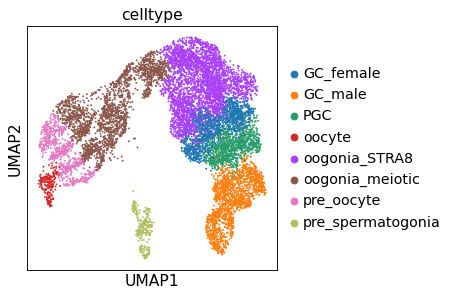

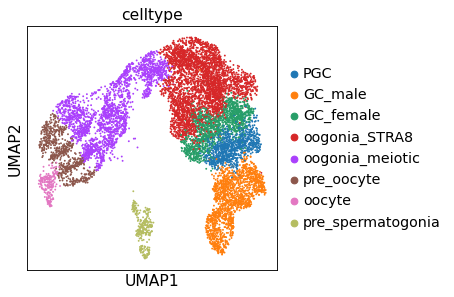

In [7]:
sc.pl.umap(adata, color=['celltype'])
adata.obs['celltype'].cat.reorder_categories(['PGC', 'GC_male','GC_female',  
                                              'oogonia_STRA8', 
                                              'oogonia_meiotic','pre_oocyte', 'oocyte', 
                                             'pre_spermatogonia'], inplace=True)
sc.pl.umap(adata, color=['celltype'])

In [8]:
adata_noMayer.obs['celltype'].cat.reorder_categories(['PGC', 'GC_male','GC_female',  
                                              'oogonia_STRA8', 
                                              'oogonia_meiotic','pre_oocyte', 'oocyte', 
                                             'pre_spermatogonia'], inplace=True)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


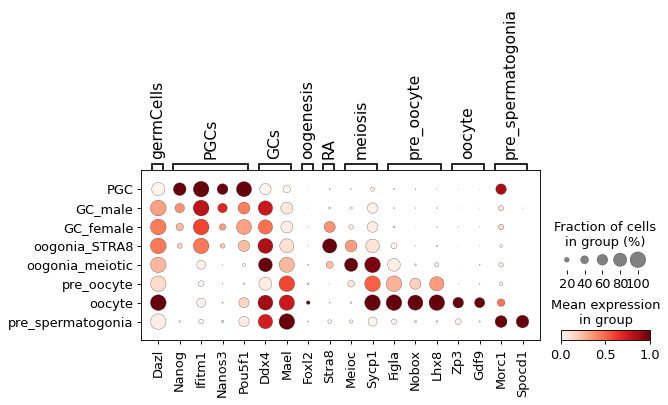

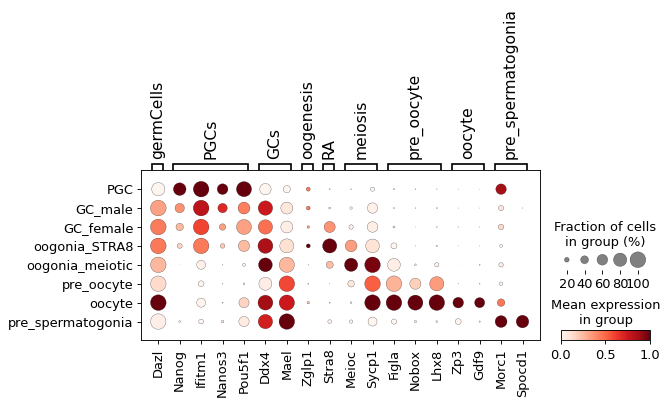

In [9]:
marker_short = {
    'germCells':{'Dazl'},
    'PGCs': {'Pou5f1', 'Nanog', 'Nanos3', 'Ifitm1'},
    'GCs': { 'Ddx4', 'Mael'},
    'oogenesis': {'Foxl2'}, 
    'RA': {'Stra8'}, 
    'meiosis': {'Sycp1', 'Meioc'}, 
    'pre_oocyte': {'Figla',  'Nobox', 'Lhx8'},
    'oocyte': {'Gdf9', 'Zp3'},
    'pre_spermatogonia':{'Morc1', 'Spocd1'}
}
marker_short_noMayer = {
    'germCells':{'Dazl'},
    'PGCs': {'Pou5f1', 'Nanog', 'Nanos3',  'Ifitm1'},
    'GCs': { 'Ddx4', 'Mael'},
    'oogenesis': {'Zglp1'}, 
    'RA': {'Stra8'}, 
    'meiosis': {'Sycp1', 'Meioc'}, 
    'pre_oocyte': {'Figla',  'Nobox', 'Lhx8'},
    'oocyte': {'Gdf9', 'Zp3'},
    'pre_spermatogonia':{'Morc1', 'Spocd1'}
}
sc.pl.dotplot(adata, marker_short, groupby='celltype', standard_scale = 'var', save='_mouse_germcellmarkers.pdf')
sc.pl.dotplot(adata_noMayer, marker_short_noMayer, groupby='celltype', standard_scale = 'var', save='_mouse_germcellmarkers_noMayer.pdf')

In [40]:
import re
adata.obs['stage_merged'] = [ re.sub('^1', 'E1', i) for i in adata.obs.stage ]

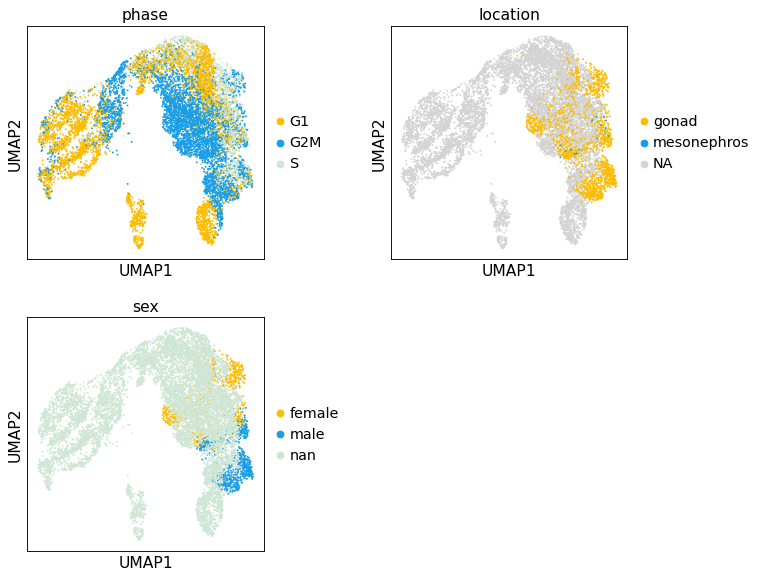

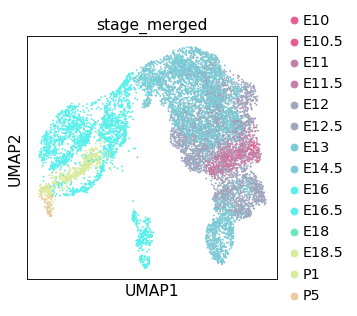

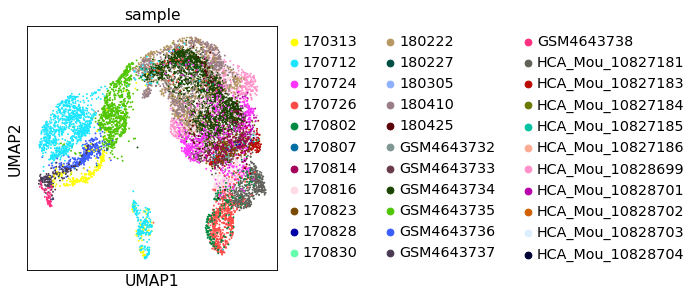

In [43]:

with plt.rc_context({'figure.figsize': (3.5, 4)}):
    sc.pl.umap(
    adata,
    color=['phase', 'location',  'sex'], palette=palette,
    frameon=True, ncols = 2, wspace = 0.4, save='_germcells_metadata_I.pdf'
)

pal_stage_merged = ['#E85C90','#E85C90', '#C481A7','#C481A7','#A0A6BE','#A0A6BE','#7CCAD5','#7CCAD5','#58EFEC','#58EFEC','#6ce6bf', '#d8eb9b', '#d8eb9b', '#ebcb9b', '#ebcb9b']
with plt.rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(
        adata,
        color=["stage_merged"], palette=pal_stage_merged,
        frameon=True, ncols = 2, wspace = 0.3, save='_germcells_metadata_II.pdf'
    )
with plt.rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(
        adata,
        color=["sample"],
        frameon=True, ncols = 2, wspace = 0.3, save='_germcells_metadata_III.pdf'
    )

## Plot cellphoneDB genes

In [11]:
import rpy2.rinterface_lib.callbacks
import logging
# Itoliste R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [12]:
%%R -o orthologous
# load orthologous
orthologous = read.csv('/nfs/team292/vl6/Mouse_Niu2020/biomart_human_mouse_orthologs.tsv', stringsAsFactors = F, sep ='\t')
# Remove duplicates prioritizing gene match
orthologous$match = (toupper(orthologous$Mouse.gene.name) == orthologous$Gene.name) * 1
orthologous = orthologous[ order(orthologous$match, decreasing = T),  ]
orthologous = orthologous[ ! duplicated(orthologous$Mouse.gene.name),  ]
orthologous = orthologous[ ! duplicated(orthologous$Gene.name),  ]
rownames(orthologous) = orthologous$Gene.name

In [13]:
orthologous_dict = orthologous['Mouse.gene.name'].to_dict()

In [14]:
cellphoneDB_genes = {
    'cortex':{'ACVR2B', 'BMPR1A', 'IGF1R', 'PTGES2', 'PTGES3',  'PDGFB', 'PNMT',
                  'EFNA4','EPHB4','CXCL12','CXCL14','KIT','ERBB3', 'DLL3'},
    'medulla':{'DLK1', 'ESR1', 'HSD17B12',  'BMP4',  'ACVR2B', 'BMPR1A',
                  'RBP4','PTH1R', 'RARA', 'CRABP2', 'EPHB6', 'CYP11A1', 'CYP19A1'},
    'follicle':{'ESR2',  'BMP6', 'GDF9', 'JAG1', 'SIRPA', 'HDC', 'NRG4', 'ALDH1A', 'CMKLR1','TGFA', 'DCC' }
}

In [15]:
cellphoneDB_genes_sorted = []

for group in cellphoneDB_genes.keys():
    cellphoneDB_genes[group] = [ orthologous_dict[i] for i in cellphoneDB_genes[group] if i in orthologous_dict.keys()]
    cellphoneDB_genes[group] = [ i for i in cellphoneDB_genes[group] if i in adata.var_names ]
    cellphoneDB_genes[group] = sorted(cellphoneDB_genes[group])
    
    
genes = [item for sublist in cellphoneDB_genes.values() for item in sublist]

In [16]:
set(X.obs.dataset)

NameError: name 'X' is not defined

In [ ]:
sc.pl.dotplot(adata[[ i not in ['pre_spermatogonia'] for i in adata.obs.celltype]], cellphoneDB_genes, groupby='celltype', standard_scale = 'var', save='_mouse_cellphoneDB_genes.pdf')
sc.pl.dotplot(adata[[ i in ['Niu2020'] for i in adata.obs.dataset]], cellphoneDB_genes, groupby='celltype', standard_scale = 'var')

In [19]:
adata.obs['stage'].value_counts()

E14.5    2260
E13      1928
E16      1441
E12      1154
12.5     1101
E16.5     789
E11       358
11.5      351
E18.5     336
E12.5     322
P1        177
P5         60
10.5       57
E10        41
E11.5      35
E18         1
Name: stage, dtype: int64

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


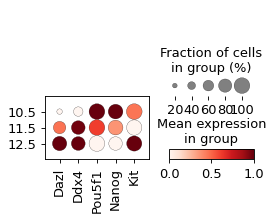

In [33]:
x = adata[[i in ['Sanger']  for i in adata.obs.dataset]]
sc.pl.dotplot(x[[ '_' not in i  for i in x.obs.celltype]], [ 'Dazl', 'Ddx4', 'Pou5f1', 'Nanog', 'Kit'], groupby='stage', standard_scale = 'var')


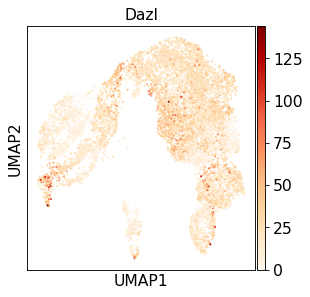

In [21]:
sc.pl.umap(
    adata,
    color=[ 'D'], color_map = "OrRd",
    frameon=True, ncols = 4, wspace = 0.2
)